In [1]:
import sys
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import tarfile
import urllib
import pandas as pd

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname = "c:/windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else :
    rc('font', family = 'AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv("C:\\Users\\KBCI\\Desktop\\2018.csv", encoding = 'UTF-8')
data.head()

,year,quarter,business_area,business,sales,week_sales_ratio,00~06_sales_ratio,06~11_sales_ratio,11~14_sales_ratio,14~17_sales_ratio,...,weekend_sales_case,00~06_sales_case,06~11_sales_case,11~14_sales_case,14~17_sales_case,17~21_sales_case,21~24_sales_case,man_sales_case,woman_sales_case,store_number
0,2018,1,발달상권,고시원,83495157.0,100,0,33,0,33,...,0,0,93,0,95,93,0,281,0,0
1,2018,1,발달상권,법무사사무소,6571318.0,100,0,0,34,66,...,0,0,0,39,77,0,0,77,39,10
2,2018,1,골목상권,문구,6044732.0,100,0,0,0,73,...,0,0,0,0,15,8,0,23,0,4
3,2018,1,골목상권,피부관리실,11863957.0,100,0,0,25,57,...,0,0,0,13,22,5,0,0,36,1
4,2018,1,골목상권,네일숍,1766586.0,85,0,0,32,0,...,3,0,0,6,0,10,3,0,15,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162666 entries, 0 to 162665
Data columns (total 41 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   year                    162666 non-null  int64  
 1   quarter                 162666 non-null  int64  
 2   business_area           162666 non-null  object 
 3   business                162666 non-null  object 
 4   sales                   162666 non-null  float64
 5   week_sales_ratio        162666 non-null  int64  
 6   00~06_sales_ratio       162666 non-null  int64  
 7   06~11_sales_ratio       162666 non-null  int64  
 8   11~14_sales_ratio       162666 non-null  int64  
 9   14~17_sales_ratio       162666 non-null  int64  
 10  17~21_sales_ratio       162666 non-null  int64  
 11  21~24_sales_ratio       162666 non-null  int64  
 12  man_sales_ratio         162666 non-null  int64  
 13  woman_sales_ratio       162666 non-null  int64  
 14  week_sales_cost     

In [5]:
data.loc[:, "business"]

0            고시원
1         법무사사무소
2             문구
3          피부관리실
4            네일숍
           ...  
162661     중식음식점
162662       한의원
162663     분식전문점
162664      치과의원
162665      일반의류
Name: business, Length: 162666, dtype: object

In [6]:
beauty = data.loc[(data["business"]=="미용실") |(data["business"]=="화장품") |
              (data["business"]=="네일숍") |(data["business"]=="피부관리실")]

In [7]:
beauty = beauty.reset_index(drop=True)
beauty.head(25)

,year,quarter,business_area,business,sales,week_sales_ratio,00~06_sales_ratio,06~11_sales_ratio,11~14_sales_ratio,14~17_sales_ratio,...,weekend_sales_case,00~06_sales_case,06~11_sales_case,11~14_sales_case,14~17_sales_case,17~21_sales_case,21~24_sales_case,man_sales_case,woman_sales_case,store_number
0,2018,1,골목상권,피부관리실,1.186396e+07,100,0,0,25,57,...,0,0,0,13,22,5,0,0,36,1
1,2018,1,골목상권,네일숍,1.766586e+06,85,0,0,32,0,...,3,0,0,6,0,10,3,0,15,2
2,2018,1,골목상권,피부관리실,6.094589e+06,70,0,13,0,57,...,11,0,6,0,19,11,0,5,31,2
3,2018,1,골목상권,화장품,1.460456e+08,78,18,9,23,14,...,611,506,87,73,191,399,509,1413,210,2
4,2018,1,전통시장,미용실,3.249449e+06,47,0,4,14,47,...,52,0,4,14,43,30,4,55,40,2
5,2018,1,전통시장,피부관리실,4.369744e+06,40,0,0,10,25,...,25,0,0,13,18,29,0,34,21,2
6,2018,1,골목상권,화장품,4.129523e+08,78,6,7,17,24,...,348,87,272,332,445,556,183,563,1280,48
7,2018,1,골목상권,미용실,3.096844e+07,65,0,3,18,28,...,476,0,63,232,351,541,37,712,499,7
8,2018,1,골목상권,미용실,1.111148e+07,79,0,3,18,28,...,78,0,9,68,98,188,2,127,238,7
9,2018,1,골목상권,피부관리실,3.698685e+07,94,0,17,10,9,...,18,0,40,25,25,101,65,5,242,3


In [8]:
beauty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14542 entries, 0 to 14541
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    14542 non-null  int64  
 1   quarter                 14542 non-null  int64  
 2   business_area           14542 non-null  object 
 3   business                14542 non-null  object 
 4   sales                   14542 non-null  float64
 5   week_sales_ratio        14542 non-null  int64  
 6   00~06_sales_ratio       14542 non-null  int64  
 7   06~11_sales_ratio       14542 non-null  int64  
 8   11~14_sales_ratio       14542 non-null  int64  
 9   14~17_sales_ratio       14542 non-null  int64  
 10  17~21_sales_ratio       14542 non-null  int64  
 11  21~24_sales_ratio       14542 non-null  int64  
 12  man_sales_ratio         14542 non-null  int64  
 13  woman_sales_ratio       14542 non-null  int64  
 14  week_sales_cost         14542 non-null

In [9]:
beauty.loc[:,"daytime_case"] = beauty.loc[:,"06~11_sales_case"]+beauty.loc[:,"11~14_sales_case"]+beauty.loc[:,"14~17_sales_case"]
beauty.loc[:,"night_case"] = beauty.loc[:,"00~06_sales_case"]+beauty.loc[:,"17~21_sales_case"]+beauty.loc[:,"21~24_sales_case"]
beauty.loc[:,"daytime_ratio"] = beauty.loc[:,"daytime_case"]/(beauty.loc[:,"daytime_case"] + beauty.loc[:,"night_case"])
beauty.loc[:,"night_ratio"] = beauty.loc[:,"night_case"]/(beauty.loc[:,"daytime_case"] + beauty.loc[:,"night_case"])
beauty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14542 entries, 0 to 14541
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    14542 non-null  int64  
 1   quarter                 14542 non-null  int64  
 2   business_area           14542 non-null  object 
 3   business                14542 non-null  object 
 4   sales                   14542 non-null  float64
 5   week_sales_ratio        14542 non-null  int64  
 6   00~06_sales_ratio       14542 non-null  int64  
 7   06~11_sales_ratio       14542 non-null  int64  
 8   11~14_sales_ratio       14542 non-null  int64  
 9   14~17_sales_ratio       14542 non-null  int64  
 10  17~21_sales_ratio       14542 non-null  int64  
 11  21~24_sales_ratio       14542 non-null  int64  
 12  man_sales_ratio         14542 non-null  int64  
 13  woman_sales_ratio       14542 non-null  int64  
 14  week_sales_cost         14542 non-null

In [10]:
beauty_drop = beauty.drop(["00~06_sales_case","06~11_sales_case","11~14_sales_case","14~17_sales_case","17~21_sales_case","21~24_sales_case"], axis=1)
beauty_drop = beauty.drop(["00~06_sales_ratio","06~11_sales_ratio","11~14_sales_ratio","14~17_sales_ratio","17~21_sales_ratio","21~24_sales_ratio"], axis=1)
beauty_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14542 entries, 0 to 14541
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    14542 non-null  int64  
 1   quarter                 14542 non-null  int64  
 2   business_area           14542 non-null  object 
 3   business                14542 non-null  object 
 4   sales                   14542 non-null  float64
 5   week_sales_ratio        14542 non-null  int64  
 6   man_sales_ratio         14542 non-null  int64  
 7   woman_sales_ratio       14542 non-null  int64  
 8   week_sales_cost         14542 non-null  float64
 9   weekend_sales_cost      14542 non-null  int64  
 10  00~06_sales_cost        14542 non-null  int64  
 11  06~11_sales_cost        14542 non-null  float64
 12  11~14_sales_cost        14542 non-null  float64
 13  14~17_sales_cost        14542 non-null  int64  
 14  17~21_sales_cost        14542 non-null

In [11]:
beauty_drop_2 = beauty_drop.drop([column for column in beauty.columns if 'case' in column], axis=1)
beauty_drop_3 = beauty_drop_2.drop([column for column in beauty.columns if 'cost' in column], axis=1)
beauty_drop_4 = beauty_drop_3.drop(['year'], axis=1)
beauty_drop_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14542 entries, 0 to 14541
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   quarter            14542 non-null  int64  
 1   business_area      14542 non-null  object 
 2   business           14542 non-null  object 
 3   sales              14542 non-null  float64
 4   week_sales_ratio   14542 non-null  int64  
 5   man_sales_ratio    14542 non-null  int64  
 6   woman_sales_ratio  14542 non-null  int64  
 7   store_number       14542 non-null  int64  
 8   daytime_ratio      14542 non-null  float64
 9   night_ratio        14542 non-null  float64
dtypes: float64(3), int64(5), object(2)
memory usage: 1.1+ MB


In [12]:
beauty_drop_4.loc[beauty_drop_4["store_number"]==0, 'store_number'] = 1
beauty_drop_4_2 = beauty_drop_4.loc[(beauty_drop_4["sales"]/beauty_drop_4["store_number"]<= 100000000)]
beauty_labels = beauty_drop_4_2['sales']/beauty_drop_4_2['store_number']
beauty_labels_2 = beauty_drop_4['sales']/beauty_drop_4['store_number']
beauty_drop_5 = beauty_drop_4_2.drop(['quarter', 'business_area', 'business', 'sales'], axis=1)

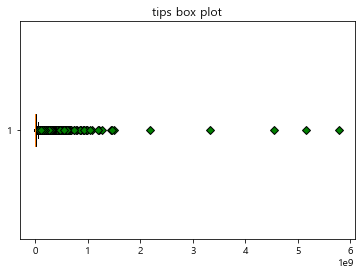

In [13]:
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(beauty_labels_2,vert=False, flierprops=green_diamond)
plt.title("tips box plot")
plt.show()

<AxesSubplot:>

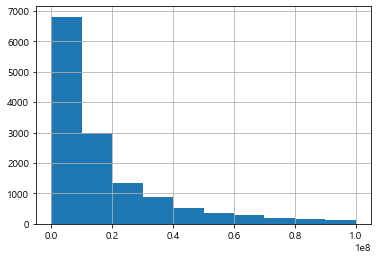

In [14]:
beauty_labels.hist()


In [15]:
from sklearn.preprocessing import OneHotEncoder

data_business_area=beauty_drop_4_2[["business_area"]]
data_business=beauty_drop_4_2[["business"]]
data_quarter=beauty_drop_4_2[["quarter"]]

data_encoder = OneHotEncoder()
business_area_data_1hot = data_encoder.fit_transform(data_business_area)
business_data_1hot = data_encoder.fit_transform(data_business)
quarter_data_1hot = data_encoder.fit_transform(data_quarter)

business_area_data_1hot.toarray()
business_data_1hot.toarray()
quarter_data_1hot.toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [16]:
def min_max_scaler(data):
  numerator= data - np.min(data,0)
  denominator = np.max(data,0) - np.min(data,0)
  return numerator / (denominator + 1e-7)

nomalization = min_max_scaler(beauty_drop_5.to_numpy())


print(nomalization)


[[1.         0.         1.         0.         0.87499991 0.12499999]
 [0.85       0.         1.         0.00510204 0.31578944 0.68421046]
 [0.7        0.15       0.85       0.00510204 0.69444438 0.30555553]
 ...
 [0.86       0.13       0.87       0.06632653 0.42060275 0.57939715]
 [1.         0.         1.         0.         0.5555555  0.4444444 ]
 [0.73       0.52       0.48       0.02040816 0.63815255 0.36184735]]


In [17]:
onehot_feature=np.concatenate((quarter_data_1hot.toarray(),business_area_data_1hot.toarray(), business_data_1hot.toarray()),axis=1)

pd_onehot_feature = pd.DataFrame(onehot_feature)
pd_onehot_feature


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13648,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13649,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13650,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13651,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
pd_nomalization = pd.DataFrame(nomalization)
pd_nomalization


,0,1,2,3,4,5
0,1.00,0.00,1.00,0.000000,0.875000,0.125000
1,0.85,0.00,1.00,0.005102,0.315789,0.684210
2,0.70,0.15,0.85,0.005102,0.694444,0.305556
3,0.78,0.83,0.17,0.005102,0.198867,0.801133
4,0.47,0.59,0.41,0.005102,0.642105,0.357895
...,...,...,...,...,...,...
13648,0.64,0.03,0.97,0.020408,0.652360,0.347639
13649,0.77,0.45,0.55,0.020408,0.459506,0.540494
13650,0.86,0.13,0.87,0.066327,0.420603,0.579397
13651,1.00,0.00,1.00,0.000000,0.555556,0.444444


In [19]:
print(type(onehot_feature))
print(type(nomalization))

prepared_data = np.concatenate((onehot_feature, nomalization), axis=1)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
pd_prepared_data = pd.DataFrame(prepared_data)
pd_prepared_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.00,0.00,1.00,0.000000,0.875000,0.125000
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.85,0.00,1.00,0.005102,0.315789,0.684210
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.70,0.15,0.85,0.005102,0.694444,0.305556
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.78,0.83,0.17,0.005102,0.198867,0.801133
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.47,0.59,0.41,0.005102,0.642105,0.357895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13648,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.64,0.03,0.97,0.020408,0.652360,0.347639
13649,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.77,0.45,0.55,0.020408,0.459506,0.540494
13650,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.86,0.13,0.87,0.066327,0.420603,0.579397
13651,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.00,0.00,1.00,0.000000,0.555556,0.444444


In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(pd_prepared_data, test_size=0.2, random_state=42)
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
10332,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.69,0.78,0.22,0.005102,0.710526,0.289474
11906,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.70,0.69,0.32,0.010204,0.500845,0.499155
4963,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.70,0.54,0.47,0.061224,0.523071,0.476929
4003,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.86,0.13,0.88,0.005102,0.468750,0.531250
8114,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.83,0.12,0.89,0.020408,0.642346,0.357654


In [22]:
from sklearn.model_selection import train_test_split
labels_train_set, labels_test_set = train_test_split(beauty_labels, test_size=0.2, random_state=42)
labels_test_set.head()

10984    7.711205e+05
12680    5.340815e+07
5280     1.640317e+07
4252     2.145992e+07
8641     2.342838e+07
dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit (train_set, labels_train_set)

LinearRegression()

In [24]:
some_data = train_set.iloc[:5]
some_labels = labels_train_set.iloc[:5]
lin_reg.predict(some_data)

array([25276416., 16936960., 11816960., 12955648., 24305664.])

In [25]:
from sklearn.metrics import mean_squared_error

beauty_prediction = lin_reg.predict(train_set)
lin_mse = mean_squared_error(labels_train_set, beauty_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

17699610.62018721

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state = 42)
tree_reg.fit(train_set, labels_train_set)

DecisionTreeRegressor(random_state=42)

In [27]:
beauty_predictions = tree_reg.predict(train_set)
tree_mse = mean_squared_error(labels_train_set, beauty_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

792004.3285288176

In [28]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train_set, labels_train_set, scoring = "neg_mean_squared_error", cv =10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([22640091.99747677, 20939922.86409215, 24657983.46343536,
       21806471.15950042, 21704957.96957648, 22264352.22165183,
       23110440.08321748, 22918910.74887478, 22538260.88271796,
       22158243.5134028 ])

In [29]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())
    
display_scores(tree_rmse_scores)

점수: [22640091.99747677 20939922.86409215 24657983.46343536 21806471.15950042
 21704957.96957648 22264352.22165183 23110440.08321748 22918910.74887478
 22538260.88271796 22158243.5134028 ]
평균: 22473963.4903946
표준편차: 945440.0418884151


In [30]:
lin_scores = cross_val_score(lin_reg, train_set, labels_train_set, scoring ="neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
pd_df = pd.DataFrame(lin_rmse_scores)

점수: [18316121.74865753 17387240.29145593 18175160.74826776 16821401.59816971
 17546252.80417878 18325776.54395908 17721797.36792576 18211201.02764053
 16501225.82129348 18152990.1182615 ]
평균: 17715916.806981005
표준편차: 615784.0338368112


In [31]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators =100, random_state = 42)
forest_reg.fit(train_set, labels_train_set)

RandomForestRegressor(random_state=42)

In [32]:
beauty_predictions = forest_reg.predict(train_set)
forest_mse = mean_squared_error(labels_train_set, beauty_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

6051767.285949839

In [33]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, train_set, labels_train_set,
                                scoring ="neg_mean_squared_error", cv =10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [16594584.47547031 16179410.54453763 17034443.86884791 15683550.9243181
 15850845.08850929 16534994.22300334 16499286.38022964 16572878.23892198
 15034417.71193399 16419115.35820366]
평균: 16240352.681397581
표준편차: 545177.775922622


In [34]:
from sklearn.model_selection import GridSearchCV
param_grid= [
    {'n_estimators': [3, 10, 30, 50], 'max_features': [2, 4, 6, 8,10]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
  ]

forest_reg = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(forest_reg, param_grid, cv =5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)
grid_search.fit(train_set, labels_train_set)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [35]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_features': 10, 'n_estimators': 50}
RandomForestRegressor(max_features=10, n_estimators=50, random_state=42)


In [36]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.042373,0.004628,0.004797,0.000400,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.774018e+14,-3.821332e+14,...,-3.745736e+14,1.027367e+13,25,-9.716060e+13,-9.836683e+13,-9.429840e+13,-9.518445e+13,-9.380315e+13,-9.576269e+13,1.735168e+12
1,0.140111,0.014512,0.011393,0.001743,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.217854e+14,-3.130767e+14,...,-3.158713e+14,8.370420e+12,16,-5.789094e+13,-5.697759e+13,-5.638413e+13,-5.742312e+13,-5.747721e+13,-5.723060e+13,5.127282e+11
2,0.434328,0.050043,0.024986,0.002605,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-3.006860e+14,-2.932550e+14,...,-2.978548e+14,1.002364e+13,12,-4.550194e+13,-4.545994e+13,-4.505450e+13,-4.518216e+13,-4.490595e+13,-4.522090e+13,2.300047e+11
3,0.663587,0.036839,0.038177,0.004443,2,50,NaN,"{'max_features': 2, 'n_estimators': 50}",-2.957952e+14,-2.907626e+14,...,-2.944493e+14,9.094267e+12,10,-4.355305e+13,-4.283237e+13,-4.268566e+13,-4.257704e+13,-4.248514e+13,-4.282665e+13,3.811846e+11
4,0.064486,0.020951,0.005398,0.000490,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.769556e+14,-3.731575e+14,...,-3.656406e+14,1.316022e+13,22,-9.566068e+13,-9.274572e+13,-9.118078e+13,-9.376716e+13,-9.477585e+13,-9.362604e+13,1.564352e+12
5,0.177551,0.010189,0.008594,0.004314,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-3.045883e+14,-3.016201e+14,...,-3.002426e+14,1.041496e+13,14,-5.343498e+13,-5.360296e+13,-5.402702e+13,-5.336811e+13,-5.523469e+13,-5.393355e+13,6.898267e+11
6,0.477706,0.015245,0.026842,0.008325,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.843530e+14,-2.829226e+14,...,-2.820386e+14,8.443298e+12,8,-4.246248e+13,-4.268364e+13,-4.298682e+13,-4.284592e+13,-4.282897e+13,-4.276157e+13,1.777204e+11
7,0.881207,0.053759,0.052968,0.020877,4,50,NaN,"{'max_features': 4, 'n_estimators': 50}",-2.791715e+14,-2.781856e+14,...,-2.782601e+14,7.692332e+12,7,-4.054409e+13,-4.053311e+13,-4.060997e+13,-3.992179e+13,-4.056282e+13,-4.043436e+13,2.576274e+11
8,0.089343,0.011767,0.008996,0.001999,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.709877e+14,-3.779683e+14,...,-3.706439e+14,3.971903e+12,23,-9.194285e+13,-9.538838e+13,-9.162640e+13,-9.451865e+13,-9.598236e+13,-9.389173e+13,1.785138e+12
9,0.283424,0.017964,0.013792,0.001469,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.964750e+14,-3.051412e+14,...,-2.983558e+14,8.611209e+12,13,-5.144198e+13,-5.304120e+13,-5.381431e+13,-5.311366e+13,-5.383707e+13,-5.304965e+13,8.710351e+11


In [37]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

19353902.74256796 {'max_features': 2, 'n_estimators': 3}
17772768.800875727 {'max_features': 2, 'n_estimators': 10}
17258470.8869112 {'max_features': 2, 'n_estimators': 30}
17159524.502053563 {'max_features': 2, 'n_estimators': 50}
19121731.358057436 {'max_features': 4, 'n_estimators': 3}
17327509.077882487 {'max_features': 4, 'n_estimators': 10}
16794005.206240866 {'max_features': 4, 'n_estimators': 30}
16681131.09929398 {'max_features': 4, 'n_estimators': 50}
19252113.435075846 {'max_features': 6, 'n_estimators': 3}
17272978.820822228 {'max_features': 6, 'n_estimators': 10}
16622239.4578671 {'max_features': 6, 'n_estimators': 30}
16541930.525285622 {'max_features': 6, 'n_estimators': 50}
18878561.890086744 {'max_features': 8, 'n_estimators': 3}
17226111.394330837 {'max_features': 8, 'n_estimators': 10}
16585224.29264029 {'max_features': 8, 'n_estimators': 30}
16466202.579861661 {'max_features': 8, 'n_estimators': 50}
18832833.359565683 {'max_features': 10, 'n_estimators': 3}
17075477

In [38]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
    'n_estimators': randint(low =1, high = 200),
    'max_features': randint(low =1, high = 8),
 }

forest_reg = RandomForestRegressor(random_state =42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions = param_distribs,
                               n_iter = 10, cv = 5, scoring = 'neg_mean_squared_error', random_state = 42)
rnd_search.fit(train_set, labels_train_set)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017F77364430>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000017F77364310>},
                   random_state=42, scoring='neg_mean_squared_error')

In [39]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

16361570.808377283 {'max_features': 7, 'n_estimators': 180}
16981009.995731425 {'max_features': 5, 'n_estimators': 15}
16806222.548991933 {'max_features': 3, 'n_estimators': 72}
16828988.519961353 {'max_features': 5, 'n_estimators': 21}
16394921.178113028 {'max_features': 7, 'n_estimators': 122}
16805750.96052463 {'max_features': 3, 'n_estimators': 75}
16791972.47544638 {'max_features': 3, 'n_estimators': 88}
16484441.303893277 {'max_features': 5, 'n_estimators': 100}
16738481.841274785 {'max_features': 3, 'n_estimators': 150}
20113954.410529707 {'max_features': 5, 'n_estimators': 2}


In [40]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.0135289 , 0.01390635, 0.01391117, 0.01411766, 0.03617694,
       0.00408618, 0.05879641, 0.00953878, 0.00677352, 0.01019483,
       0.01218986, 0.04350056, 0.13062943, 0.10830552, 0.10734941,
       0.12047472, 0.14842948, 0.14809027])

In [41]:
final_model = rnd_search.best_estimator_
final_predictions = final_model.predict(test_set)

final_mse = mean_squared_error(labels_test_set, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

15954505.69408681